# Recommendation System
--------------------------------------------
* Collaborative Filtering
  * user based (logistic regression)
  * item based (using Pearson coefficient)
  * popularity based recommendation system( KNN Algorithm)
* Content Based Filtering
  * content based (KNN recommendation)


In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("../input/recomend-data/rating_final.csv")
cuisine = pd.read_csv("../input/recomend-data/chefmozcuisine.csv")

In [3]:
df.head()

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [4]:
cuisine.head()

,placeID,Rcuisine
0,135110,Spanish
1,135109,Italian
2,135107,Latin_American
3,135106,Mexican
4,135105,Fast_Food


In [5]:
### recomendation based on counting
working_df = df[['userID','placeID','rating']]

In [6]:
working_df.head()

,userID,placeID,rating
0,U1077,135085,2
1,U1077,135038,2
2,U1077,132825,2
3,U1077,135060,1
4,U1068,135104,1


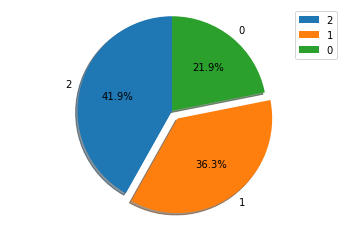

In [7]:
import matplotlib.pyplot as plt
r = pd.DataFrame(working_df.rating.value_counts())
labels = list(r.index)
data = list(r['rating'])
explode = (0, 0.1, 0)
fig1, ax1 = plt.subplots()
ax1.pie(data, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend()
plt.show()

In [8]:
## take the data and geoup the place(which in this case a resturant)
## then groupby the number of rating count
rating_count = pd.DataFrame(df.groupby('placeID')['rating'].count())

In [9]:
## and sort them based on the assending order
most_rated = rating_count.sort_values('rating',ascending=False)

In [10]:
top = most_rated.head()
top

,rating
placeID,
135085,36
132825,32
135032,28
135052,25
132834,25


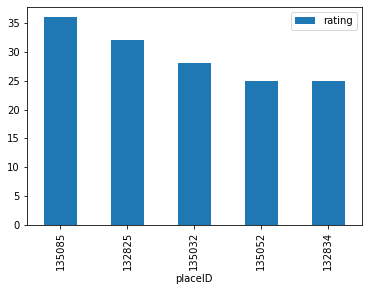

In [11]:
top.plot(kind='bar')

In [12]:
## in order to merge the coumn you need
final = pd.merge(top,cuisine,on='placeID')

In [13]:
final

,placeID,rating,Rcuisine
0,135085,36,Fast_Food
1,132825,32,Mexican
2,135032,28,Cafeteria
3,135032,28,Contemporary
4,135052,25,Bar
5,135052,25,Bar_Pub_Brewery
6,132834,25,Mexican


In [14]:
final2 = pd.DataFrame(final.groupby('Rcuisine')['rating'].count())

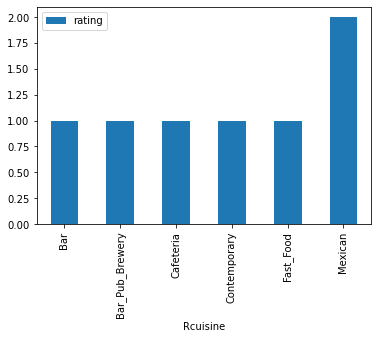

In [15]:
final2.plot(kind='bar')

In [16]:
### so we can see the maxican food get the most rating in the top resturant
### so we can recomend the mexican food

## Correlation based Algorithm (user to user filtering) (form of collaborative filtering)
    * use the pearson r cofieient the <br>
    * for r =1 positive linear relationship
    * r = 0 no relation shop
    * r = -1 negative relation
    
    

In [17]:
import numpy as np
import pandas as pd

In [18]:
df = pd.read_csv("../input/recomend-data/rating_final.csv")
cuisine = pd.read_csv("../input/recomend-data/chefmozcuisine.csv")
geodata = pd.read_csv("../input/recomend-data/geoplaces2.csv", engine='python')

In [19]:
df.head()

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [20]:
cuisine.head()

,placeID,Rcuisine
0,135110,Spanish
1,135109,Italian
2,135107,Latin_American
3,135106,Mexican
4,135105,Fast_Food


In [21]:
geodata.head()

,placeID,latitude,longitude,the_geom_meter,name,address,city,state,country,fax,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,?,...,No_Alcohol_Served,none,informal,no_accessibility,medium,kikucuernavaca.com.mx,familiar,f,closed,none
1,132825,22.147392,-100.983092,0101000020957F00001AD016568C4858C1243261274BA5...,puesto de tacos,esquina santos degollado y leon guzman,s.l.p.,s.l.p.,mexico,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,f,open,none
2,135106,22.149709,-100.976093,0101000020957F0000649D6F21634858C119AE9BF528A3...,El Rinc�n de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,?,...,Wine-Beer,only at bar,informal,partially,medium,?,familiar,f,open,none
3,132667,23.752697,-99.163359,0101000020957F00005D67BCDDED8157C1222A2DC8D84D...,little pizza Emilio Portes Gil,calle emilio portes gil,victoria,tamaulipas,?,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,t,closed,none
4,132613,23.752903,-99.165076,0101000020957F00008EBA2D06DC8157C194E03B7B504E...,carnitas_mata,lic. Emilio portes gil,victoria,Tamaulipas,Mexico,?,...,No_Alcohol_Served,permitted,informal,completely,medium,?,familiar,t,closed,none


In [22]:
geodata = geodata[['placeID','name']]

In [23]:
geodata.head()

,placeID,name
0,134999,Kiku Cuernavaca
1,132825,puesto de tacos
2,135106,El Rinc�n de San Francisco
3,132667,little pizza Emilio Portes Gil
4,132613,carnitas_mata


In [24]:
new_rating = pd.DataFrame(df.groupby('placeID')['rating'].mean())

In [25]:
new_rating.head()

,rating
placeID,
132560,0.50
132561,0.75
132564,1.25
132572,1.00
132583,1.00


In [26]:
new_rating['rating_count'] = pd.DataFrame(df.groupby('placeID')['rating'].count())

In [27]:
new_rating

,rating,rating_count
placeID,,
132560,0.500000,4
132561,0.750000,4
132564,1.250000,4
132572,1.000000,15
132583,1.000000,4
...,...,...
135088,1.000000,6
135104,0.857143,7
135106,1.200000,10


In [28]:
## sort the new_rating based on the assending value
final1 = new_rating.sort_values('rating_count',ascending=False).head()

In [29]:
final1

,rating,rating_count
placeID,,
135085,1.333333,36
132825,1.281250,32
135032,1.178571,28
135052,1.280000,25
132834,1.000000,25


In [30]:
#### now merge the data to get the 
final = pd.merge(final1,geodata,on='placeID')

In [31]:
final

,placeID,rating,rating_count,name
0,135085,1.333333,36,Tortas Locas Hipocampo
1,132825,1.281250,32,puesto de tacos
2,135032,1.178571,28,Cafeteria y Restaurant El Pacifico
3,135052,1.280000,25,La Cantina Restaurante
4,132834,1.000000,25,Gorditas Doa Gloria


In [32]:
final = pd.merge(final,cuisine,on='placeID')

In [33]:
final

,placeID,rating,rating_count,name,Rcuisine
0,135085,1.333333,36,Tortas Locas Hipocampo,Fast_Food
1,132825,1.281250,32,puesto de tacos,Mexican
2,135032,1.178571,28,Cafeteria y Restaurant El Pacifico,Cafeteria
3,135032,1.178571,28,Cafeteria y Restaurant El Pacifico,Contemporary
4,135052,1.280000,25,La Cantina Restaurante,Bar
5,135052,1.280000,25,La Cantina Restaurante,Bar_Pub_Brewery
6,132834,1.000000,25,Gorditas Doa Gloria,Mexican


In [34]:
## doing a cross_tab analysis for the df data frame
df.head() ### this is the data frame we are doing crosstab analysis

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [35]:
places_crosstab = pd.pivot_table(data=df,values='rating',index='userID',columns='placeID')

In [36]:
places_crosstab

placeID,132560,132561,132564,132572,132583,132584,132594,132608,132609,132613,...,135080,135081,135082,135085,135086,135088,135104,135106,135108,135109
userID,,,,,,,,,,,,,,,,,,,,,
U1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
U1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
U1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
U1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
U1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U1134,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
U1135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN
U1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
### this data actiually shows the raing is given by different user to different places
## there is null value because not all user give rating  to all places

In [38]:
places_crosstab.head()

placeID,132560,132561,132564,132572,132583,132584,132594,132608,132609,132613,...,135080,135081,135082,135085,135086,135088,135104,135106,135108,135109
userID,,,,,,,,,,,,,,,,,,,,,
U1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
U1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
U1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
U1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
U1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
first = final['placeID'][0] ## this is the first that has the highest rating

In [40]:
first

135085

In [41]:
## so now from the crosstab we can find all the rating 
## of this place that user give
## and we can fin dit on clumn
## becase the cross tab the places is in the column
tortas_rating = places_crosstab[first]

In [42]:
tortas_rating

userID
U1001    0.0
U1002    1.0
U1003    NaN
U1004    NaN
U1005    NaN
        ... 
U1134    2.0
U1135    0.0
U1136    NaN
U1137    2.0
U1138    NaN
Name: 135085, Length: 138, dtype: float64

In [43]:
tortas_rating
## now remove the NAN
tortas_rating = tortas_rating[tortas_rating >= 0]


In [44]:
tortas_rating

userID
U1001    0.0
U1002    1.0
U1007    1.0
U1013    1.0
U1016    2.0
U1027    1.0
U1029    1.0
U1032    1.0
U1033    2.0
U1036    2.0
U1045    2.0
U1046    1.0
U1049    0.0
U1056    2.0
U1059    2.0
U1062    0.0
U1077    2.0
U1081    1.0
U1084    2.0
U1086    2.0
U1089    1.0
U1090    2.0
U1092    0.0
U1098    1.0
U1104    2.0
U1106    2.0
U1108    1.0
U1109    2.0
U1113    1.0
U1116    2.0
U1120    0.0
U1122    2.0
U1132    2.0
U1134    2.0
U1135    0.0
U1137    2.0
Name: 135085, dtype: float64

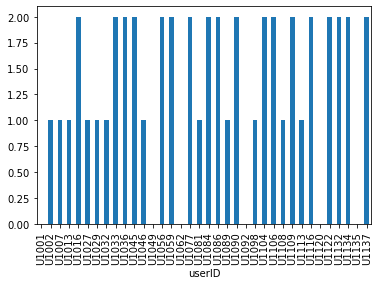

In [45]:
tortas_rating.plot(kind="bar")

In [46]:
tortas_rating

userID
U1001    0.0
U1002    1.0
U1007    1.0
U1013    1.0
U1016    2.0
U1027    1.0
U1029    1.0
U1032    1.0
U1033    2.0
U1036    2.0
U1045    2.0
U1046    1.0
U1049    0.0
U1056    2.0
U1059    2.0
U1062    0.0
U1077    2.0
U1081    1.0
U1084    2.0
U1086    2.0
U1089    1.0
U1090    2.0
U1092    0.0
U1098    1.0
U1104    2.0
U1106    2.0
U1108    1.0
U1109    2.0
U1113    1.0
U1116    2.0
U1120    0.0
U1122    2.0
U1132    2.0
U1134    2.0
U1135    0.0
U1137    2.0
Name: 135085, dtype: float64

### now the tortas resturant does the best now from the cross tab analysis we will find which resturant is simmiler to the tortas based on the user simillar rating .it will create a pearson r coeffieient between the tortas resturant and other resturant


In [47]:
similler_tortas = places_crosstab.corrwith(tortas_rating)
corr_tortus = pd.DataFrame(similler_tortas,columns=["pearson_r"])
corr_tortus.dropna(inplace=True)

/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [48]:
corr_tortus

,pearson_r
placeID,
132572,-0.428571
132723,0.301511
132754,0.930261
132825,0.700745
132834,0.814823
132856,0.475191
132861,0.500000
132862,0.559017
132872,0.840168


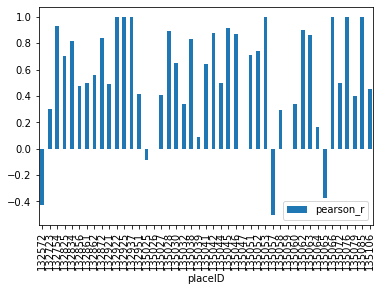

In [49]:
corr_tortus.plot(kind='bar')

In [50]:
## we slao need to know that the similler places rating count
corr_tortus['rating_count'] = new_rating['rating_count']

In [51]:
corr_smry_w_tortas=pd.DataFrame(corr_tortus)

In [52]:
## target
    ## we want to find the resturant that has best positive corrlation
    ## and has god rating [rating greater than 10]

In [53]:
similler = corr_smry_w_tortas[corr_smry_w_tortas['rating_count']>10].sort_values('pearson_r',ascending=False)

In [54]:
similler.head()

,pearson_r,rating_count
placeID,,
135085,1.000000,36
135076,1.000000,13
135066,1.000000,12
132754,0.930261,13
135045,0.912871,13


In [55]:
## for those in pearson r has 1 means that it has only one rating
## so we throw out them
final = pd.merge(similler,cuisine,on='placeID')


In [56]:
final2 = pd.merge(final,geodata,on='placeID')

In [57]:
final2.head()

,placeID,pearson_r,rating_count,Rcuisine,name
0,135085,1.000000,36,Fast_Food,Tortas Locas Hipocampo
1,132754,0.930261,13,Mexican,Cabana Huasteca
2,135028,0.892218,15,Mexican,La Virreina
3,135042,0.881409,20,Chinese,Restaurant Oriental Express
4,135046,0.867722,11,Fast_Food,Restaurante El Reyecito


# Tortas serve Fast_food
# so we will find which serve fast food


In [58]:
final2[final2['Rcuisine']=='Fast_Food']

,placeID,pearson_r,rating_count,Rcuisine,name
0,135085,1.000000,36,Fast_Food,Tortas Locas Hipocampo
4,135046,0.867722,11,Fast_Food,Restaurante El Reyecito


## so the most similler resturant like Tortas is "Restaurante El Reyecito" 

# User Based Colaborative Filtering

In [59]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [60]:
df = pd.read_csv("../input/recomend-data/bank_full_w_dummy_vars.csv")

In [61]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_unknown,job_retired,job_services,job_self_employed,job_unemployed,job_maid,job_student,married,single,divorced
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,0,0,0,0,1,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,1,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,0,0,0,0,0,1,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,1,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1,0,0,0,0,0,0,0,1,1


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   age                           45211 non-null  int64 
 1   job                           45211 non-null  object
 2   marital                       45211 non-null  object
 3   education                     45211 non-null  object
 4   default                       45211 non-null  object
 5   balance                       45211 non-null  int64 
 6   housing                       45211 non-null  object
 7   loan                          45211 non-null  object
 8   contact                       45211 non-null  object
 9   day                           45211 non-null  int64 
 10  month                         45211 non-null  object
 11  duration                      45211 non-null  int64 
 12  campaign                      45211 non-null  int64 
 13  pdays           

In [63]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'y_binary                    ',
       'housing_loan                ', 'credit_in_default', 'personal_loans',
       'prev_failed_to_subscribe    ', 'prev_subscribed             ',
       'job_management              ', 'job_tech                    ',
       'job_entrepreneur            ', 'job_bluecollar              ',
       'job_unknown                 ', 'job_retired                 ',
       'job_services                ', 'job_self_employed           ',
       'job_unemployed              ', 'job_maid                    ',
       'job_student                 ', 'married                     ',
       'single                      ', 'divorced                    '],
      dtype='object')

In [64]:
X = df.iloc[:,18:36]

In [65]:
X.head()

,housing_loan,credit_in_default,personal_loans,prev_failed_to_subscribe,prev_subscribed,job_management,job_tech,job_entrepreneur,job_bluecollar,job_unknown,job_retired,job_services,job_self_employed,job_unemployed,job_maid,job_student,married,single
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [66]:
Y = df[['y_binary                    ']]

In [67]:
X.head()

,housing_loan,credit_in_default,personal_loans,prev_failed_to_subscribe,prev_subscribed,job_management,job_tech,job_entrepreneur,job_bluecollar,job_unknown,job_retired,job_services,job_self_employed,job_unemployed,job_maid,job_student,married,single
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [68]:
Y.head()

,y_binary
0,0
1,0
2,0
3,0
4,0


In [69]:
Logreg1 = LogisticRegression()


In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y)

In [71]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

33908
33908
11303
11303


In [72]:
Logreg1.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [73]:
Logreg1.score(x_test,y_test)

0.8940104397062727

In [74]:
x_test.values[0]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [75]:
Logreg1.predict([x_test.values[0]])

array([0])

## CONTENT BASED RECOMENDATION SYSTEM (USING MEMORY BASED CLASSIFIER) (KNN)
## RECOMENDATION IS DONE BASED ON THE FEATURES
## NOT THE USER RATING

In [76]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.neighbors import NearestNeighbors

In [77]:
df = pd.read_csv("../input/recomend-data/mtcars.csv")

In [78]:
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [79]:
X = df[['mpg','cyl','disp','hp','drat','wt','qsec']]

In [80]:
nbrc = NearestNeighbors(n_neighbors=1).fit(X)

In [81]:
nbrc

NearestNeighbors(n_neighbors=1)

## now make a test data properties of the car engine and usig knn find which row of the car properties is similler to the test data

In [82]:
nbrc.kneighbors([[15.0 ,9,260.0 ,90 ,2.90 ,1.620 ,20.46]])

(array([[21.39104544]]), array([[3]]))

In [83]:
df[df.index==3]

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1


In [84]:
## so we can see that it finds the related property car